<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/ex1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Regresión Lineal
***
## Empezamos con una variable


## Lectura de datos (Población en ciudades (x10.000) e Ingreso medio (x 10.000)

In [79]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = pd.read_csv('https://drive.google.com/uc?id=16jQHaXQNBNIe-wYZvA52stkBwOP6kQta', names=['Poblacion', 'Ingresos'])
data1.head()

,Poblacion,Ingresos
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Graficamos los datos a ver si vemos una posible relación lineal  entre población (var indep) e y (var objetivo o dep.)


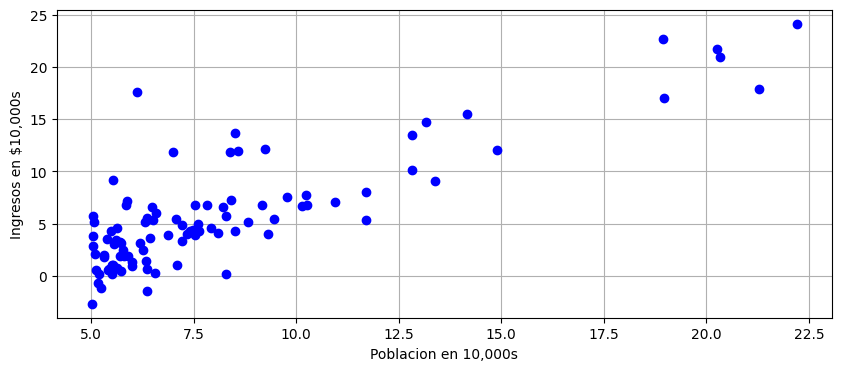

In [80]:
plt.figure(figsize=(10, 4))
plt.xlabel('Poblacion en 10,000s')
plt.ylabel('Ingresos en $10,000s')
plt.grid()
plt.plot(data1.Poblacion, data1.Ingresos, 'bo')

## Gradiente Descendente

Nos planteamos un modelo (hipótesis)
$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

Debemos encontrar los parámetros  $\theta$  a partir de nuestro conjunto de datos utilizando la técnica del gradiente descendente.

#### 1.- Fundamentos

El objetivo de la regresión lineal es minimizar la función de coste

$J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

donde la hipótesis $h_{\theta}(x)$ está dada por el modelo lineal

$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

Debemnos encontrar son los valores de $\theta_j$ que son los parámetros de nuestro modelo y que minimicen la función de coste $J(\theta)$. Utilizaremos el algoritmo iterativo del gradiente descendente visto en clase.

En cada iteración del algoritmo debemos realizar la actualización de los valores  $\theta_j$ de acuerdo a .

$\theta_j:=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ (actualización simultánea de $\theta_j$ para todo $j$)

En cada iteración, ols parámetros $\theta_j$ se aproximan al valor óptimo que nos permite obrener el valor mínimo de $J(\theta)$.

#### 2.- Implementación

Recordar que debemos añadir una columna de 1's al inicio de nuestro conjunto de datos para poder  calcular en el mismo paso  $\theta_0$ y debemos inicializar  $\theta_j$ a $0$.

In [81]:
# Preparamos oos datos.
def prepareData(data, n):
    """
    Add 1s column, convert to matrices,
    initialize theta.
    Args:
        data: dataframe
        n: int
    Returns:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Insertamos la columna de 1's en el primer puesto.
    data.insert(0, 'Ones', 1)

    # Ya tenemos nuestros datos.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convertimos a matrices e inicializamos theta con 0s.
    # Theta is a vector [n + 1 x 1] y su traspuesto a vector [1 x n+1],
    # n es el número de características (var. predictoras).
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta



#### Cálculo de la función de  Coste $J(\theta)$



In [82]:
# Cálculo de la función de coste.
def computeCost(x, y, theta):
    """
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost



In [83]:
# Número de variables.
n = len(data1.columns)-1 # quitamos la columma objetivo (a predecir)

In [84]:
# Obtenemos la matriz X (con un 1 como primera columna, recordar)
x, y, theta = prepareData(data1, n)

In [85]:
# Revisemos las matrices.
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [86]:
#veamos el coste inicial ( theta = 0s)
computeCost(x, y, theta)

32.072733877455676

#### Gradiente Descendente

Implementaremos el algoritmo mediante un bucle.  

Una buena forma de verificar que el algoritmo funciona correctamente es observar el valor de $J(\theta)$ y comprobar que disminuye con cada paso. Después de la implementación correcta del  gradiente descendente, el valor de $J(\theta)$ nunca debería aumentar y debería converger a un valor estable al final del algoritmo. Los parámetros finales se utilizarán para dibujar la recta de ajuste y hacer predicciones sobre los ingresos en zonas de 35.000 y 70.000 habitantes.



In [87]:
def gradientDescent(x, theta, max_iter,epsilon = 10e-5):
    """

    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
        max_iter:max number of iterations in the algorithm
        epsilon: diference between two sucesive J (cost values)
    Returns:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
        i: iteration at which convergence is obtained

    """
    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)



Trabajaremos con un "learning rate" $\alpha$ de 0.01 y 10000 iteraciones como máximo.

In [88]:
iterations = 2000
alpha = 0.001
epsilon = 10e-5

In [89]:
theta, J_vals, iter= gradientDescent(x, theta, iterations,epsilon)

In [90]:
betaHat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[-3.89578088]
 [ 1.19303364]]


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [92]:
x1 = x[:,1:2]
#quitamos la columna de 1

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=101)

In [94]:
# creating a regression model
model = LinearRegression()

In [95]:
# fitting the model
model.fit(np.asarray(X_train),np.asarray(y_train))

LinearRegression()

In [96]:

#making predictions
predictions = model.predict(np.asarray(X_test))

In [97]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(np.asarray(y_test), predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(np.asarray(y_test), predictions))

mean_squared_error :  8.224629535888901
mean_absolute_error :  2.0191678534178497


In [98]:
print('model intercept :', model.intercept_)
print('model coefficients : ', model.coef_)
print('Model score : ', model.score(np.asarray(x1), np.asarray(y)))

model intercept : [-3.89628476]
model coefficients :  [[1.19527856]]
Model score :  0.7020185075439245


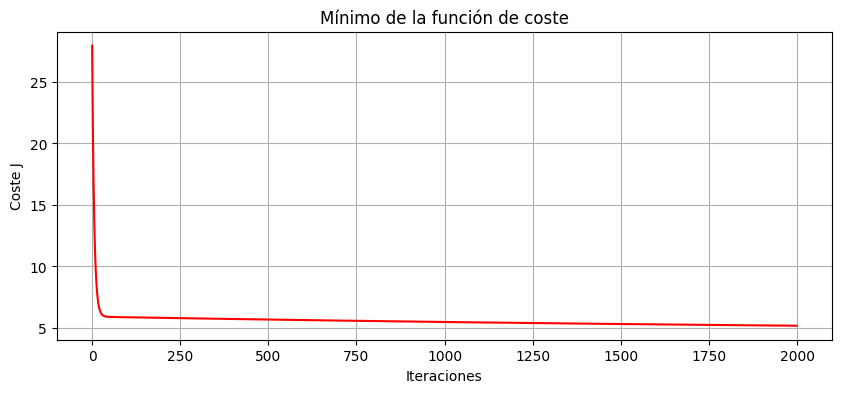

In [99]:
plt.figure(figsize=(10, 4))
plt.xlabel('Iteraciones')
plt.ylabel('Coste J')
plt.title('Mínimo de la función de coste')
plt.grid()
ejex = np.arange(iter+1)
plt.plot(ejex, J_vals, 'r')

In [100]:
computeCost(x, y, theta)

5.176562563777922

In [101]:
theta

matrix([[-1.12369018],
        [ 0.91454707]])

#### Dibujar la recta de ajuste

In [102]:
theta_f = list(theta.flat)
theta_f

[-1.1236901822565755, 0.9145470654062331]

<ipython-input-103-146ec32ac970>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(xs, ys, 'r-', label='Regresión Lineal: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))


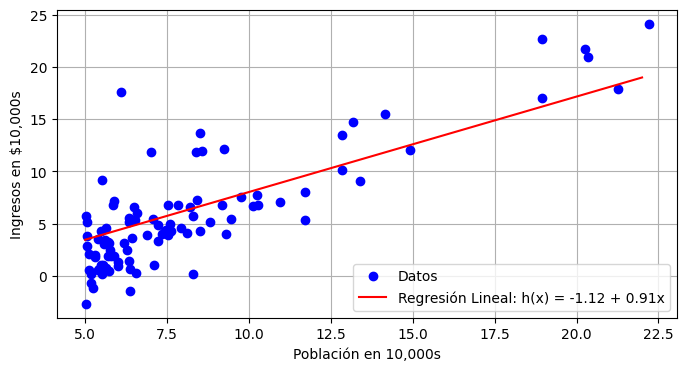

In [103]:
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs
plt.figure(figsize=(8, 4))
plt.xlabel('Población en 10,000s')
plt.ylabel('Ingresos en $10,000s')
plt.grid()
plt.plot(data1.Poblacion, data1.Ingresos, 'bo', label='Datos')
plt.plot(xs, ys, 'r-', label='Regresión Lineal: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4)

### El coeficiente de determinación se puede calcular como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [104]:
y_calc = np.array(theta_f[0] + theta_f[1] * x[:,1].flat)
y_calc = y_calc.reshape(len(y_calc),1)

In [105]:
print("Ingresos Reales   y    Calculados")
print(np.c_[y[0:5],y_calc[0:5]])

Ingresos Reales   y    Calculados
[[17.592       4.46428384]
 [ 9.1302      3.93165163]
 [13.662       6.66697045]
 [11.854       5.28106583]
 [ 6.8233      4.23537271]]


In [106]:
suma_errores = np.sum(np.power((y-y_calc),2))
suma_errores

1004.2531373729169

In [107]:
# Error cuadrático medio
MSE = suma_errores/x.shape[0]
MSE

10.353125127555844

## El coeficiente de determinación se puede calcular como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [108]:
r = y - y_calc
m,n = x.shape[0],x.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum (np.power((y - np.mean(y)),2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.6481392652080954


#### Predicciones
población de 35000 y 70000

In [109]:
print((theta_f[0] + theta_f[1] * 3.5) * 10000)
print((theta_f[0] + theta_f[1] * 7) * 10000)

20772.245466652403
52781.39275587057
